# Предсказание стоимости автомобилей

<b>Задача</b>

Предсказать стоимость машин и понять, от каких факторов зависит ценообразование на автомобили. Узнать, какие переменные важны для прогнозирования и насколько хорошо полученная модель описывает данные. 

<b>Данные</b>

Есть датасет с информацией об автомобилях и их цене.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [2]:
data = pd.read_csv('cars.csv')

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

В датасете 205 наблюдений, 26 признаков. Нет пропусков.

В столбце CarName указано полное название автомобиля. Создадим новый признак (марку автомобиля) на основе этого столбца. Для этого разделим значения в ячейках по пробелу и запишем в новый столбец первый элемент.

In [5]:
data['company'] = [x[0] for x in data.CarName.str.split()]

In [6]:
# кол-во уникальных марок автомобилей
data['company'].nunique()

28

Столбцы CarName с полным названием машины и car_ID удалим из датасета, они не пригодятся для дальнейшего анализа.

In [7]:
data = data.drop(['CarName', 'car_ID'], axis=1)

In [8]:
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [9]:
# посмотрим внимательнее на марки автомобилей - есть несколько ошибок в написании, исправим
data['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [10]:
data['company'] = data['company'].replace({'maxda': 'mazda', 'porcshce': 'porsche', 'toyouta': 'toyota', \
                                           'vokswagen': 'volkswagen', 'vw': 'volkswagen'}).str.lower()

In [11]:
data['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [12]:
data['company'].nunique()

22

Чтобы не перегружать модель большим количеством предикторов, оставим только часть из них:
'company', 'fueltype', 'aspiration','carbody', 'drivewheel', 'wheelbase', 'carlength','carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower' и добавим признак 'price', так как его нам надо предсказать.

Посмотрим корреляцию между признаками.

In [13]:
df = data[['company', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', \
          'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'price']]

In [14]:
df.corr().round(2)

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price
wheelbase,1.00,0.87,0.80,0.78,0.57,0.49,0.35,0.58
carlength,0.87,1.00,0.84,0.88,0.68,0.61,0.55,0.68
carwidth,0.80,0.84,1.00,0.87,0.74,0.56,0.64,0.76
curbweight,0.78,0.88,0.87,1.00,0.85,0.65,0.75,0.84
enginesize,0.57,0.68,0.74,0.85,1.00,0.58,0.81,0.87
boreratio,0.49,0.61,0.56,0.65,0.58,1.00,0.57,0.55
horsepower,0.35,0.55,0.64,0.75,0.81,0.57,1.00,0.81
price,0.58,0.68,0.76,0.84,0.87,0.55,0.81,1.00


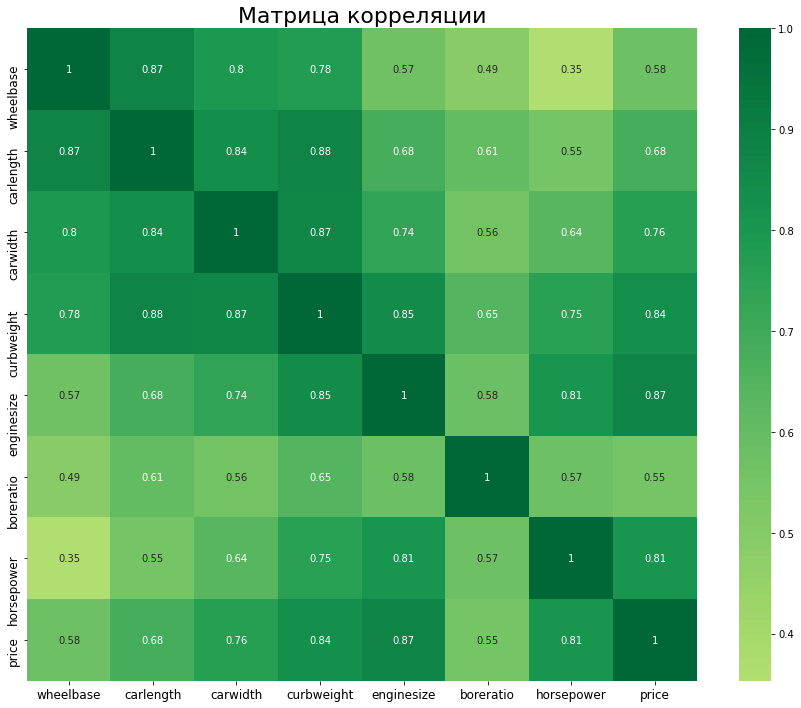

In [15]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, \
            cmap='RdYlGn', center=0, annot=True)
plt.title('Матрица корреляции', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show();

Линейная регрессия не справляется с категориальными переменными (типом object), поэтому применим функцию под названием pd.get_dummies(). Она создаёт так называемые фиктивные переменные на основе изначальных категорий, представленные в виде 0 и 1.

In [16]:
df_dummy = pd.get_dummies(data=df, drop_first = True)

In [17]:
df_dummy.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,company_audi,company_bmw,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,1,0,...,1,0,0,0,1,0,0,0,0,0


Построим небольшую модель с одним предиктором цены – horsepower.

In [18]:
X = sm.add_constant(df.horsepower) # независимая переменная
Y = df.price  # зависимая переменная
model = sm.OLS(Y, X)  # говорим модели, что у нас ЗП (price), а что НП (horsepower)
results = model.fit()  # строим регрессионную прямую
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           1.48e-48
Time:                        15:43:52   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3721.7615    929.849     -4.003      0.0

Получили процент изменчивости модели 65% (R-squared).

Теперь построим ещё две модели:

- модель со всеми предикторами
- модель со всеми предикторами, кроме марок машин

In [19]:
# модель со всеми предикторами
X_no_price = df_dummy.drop('price', axis=1)
X_all = sm.add_constant(X_no_price)  # независимая переменная 
Y_all = df_dummy['price'] # зависимая переменная

model_all = sm.OLS(Y_all, X_all)
results_all = model_all.fit()  # строим регрессионную прямую
print(results_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     81.09
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           4.86e-89
Time:                        15:43:52   Log-Likelihood:                -1804.2
No. Observations:                 205   AIC:                             3702.
Df Residuals:                     158   BIC:                             3858.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.472e+

Построим модель со всеми предикторами, кроме марок машин. Для этого подготовим датасет.

In [20]:
df_no_company = data[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', \
          'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'price']]

In [21]:
df_dummy_no_company = pd.get_dummies(data=df_no_company, drop_first = True)

In [22]:
# модель со всеми предикторами, кроме марок машин
X_no_company = df_dummy_no_company.drop('price', axis=1)
X_no_company = sm.add_constant(X_no_company)  # независимая переменная 
Y_no_company = df_dummy_no_company['price'] # зависимая переменная

model_no_company = sm.OLS(Y_no_company, X_no_company)
results_no_company = model_no_company.fit()  # строим регрессионную прямую
print(results_no_company.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     72.32
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           9.86e-81
Time:                        15:43:53   Log-Likelihood:                -1881.6
No. Observations:                 205   AIC:                             3817.
Df Residuals:                     178   BIC:                             3907.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -1.7e+

- Если судить чисто по диагностическим показателям (R2), то модель со всеми предикторами лучшая.
- Большинство коэффициентов, связанных с марками машин, статистически незначимы.

Хотя марки машин и объясняют какую-то часть общей дисперсии в данных, эта часть не самая большая - около 4%. На фоне того, как эта переменная усложняет модель дополнительными статнезначимыми коэффициентами, мы можем принять решение убрать её из модели и использовать последнюю модель со всеми предикторами, кроме марки машин.

Выбранная модель объясняет примерно 90% дисперсии (Adj. R-squared). Среди предикторов 10 из 27 оказались не значимыми (p > 0.05). 

Пример интерпретации: при единичном изменении показателя horsepower, цена возрастает на 86.8164.

## Вывод

В ходе данного проекта было сделано:
- создали новый признак Марка автомобиля (company) на основе признака Название автомобиля (CarName)
- исправили ошибки в названии марок автомобилей
- посчитали корреляцию между признаками и построили матрицу корреляции
- для построения модели линейной регрессии заменили категориальные переменные способом OHE
- построили 3 модели линейной регрессии: 
    - с одним признаком horsepower
    - со всеми признаками
    - со всеми признаками, кроме марки машин
- выбрали лучшую модель на основе значений R2 и статистически незначимых коэффициентов 